In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import cv2
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

In [2]:
train_path = 'new_devnagari/train'
valid_path = 'new_devnagari/val'
test_path = 'new_devnagari/test'

In [3]:
folders = glob.glob('new_devnagari/train/*')
len(folders)

58

In [4]:
IMAGE_SIZE = (28, 28)

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_set = train_datagen.flow_from_directory(train_path,
                                          target_size=IMAGE_SIZE,
                                          batch_size=32,
                                            # color_mode='grayscale',
                                          class_mode='categorical')
valid_set = valid_datagen.flow_from_directory(valid_path,
                                          target_size=IMAGE_SIZE,
                                          batch_size=32,
                                            # color_mode='grayscale',
                                          class_mode='categorical')
test_set = valid_datagen.flow_from_directory(test_path,
                                          target_size=IMAGE_SIZE,
                                          batch_size=32,
                                            # color_mode='grayscale',
                                            class_mode='categorical',
                                             shuffle=False)

Found 9006 images belonging to 58 classes.
Found 2574 images belonging to 58 classes.
Found 1332 images belonging to 58 classes.


In [6]:
len(train_set)

282

In [7]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(len(folders), activation='softmax')  # Change the output layer activation according to the number of classes
])

C:\Users\basne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 1, 1, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 58)                  │           5,858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,534 (556.77 KB)

 Trainable params: 142,534 (556.77 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
#  model.load_weights('/content/drive/MyDrive/Colab Notebooks/lfw_original/lfw/models/lfw_.h5')

es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)

filepath = 'model_full.keras'
mc = ModelCheckpoint(filepath,
                     monitor='val_accuracy', 
                     mode='max',
                     save_best_only=True)
log_csv  = CSVLogger('model_full.csv', separator=',', append = False)

In [11]:
r = model.fit(train_set,
         validation_data=valid_set,
         epochs=20,
         callbacks=[mc, es, log_csv]
         )

Epoch 1/20


C:\Users\basne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


282/282 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.0888 - loss: 3.6955 - val_accuracy: 0.5237 - val_loss: 1.6078
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.5925 - loss: 1.3551 - val_accuracy: 0.7490 - val_loss: 0.8491
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.7684 - loss: 0.7422 - val_accuracy: 0.8205 - val_loss: 0.5948
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.8543 - loss: 0.4773 - val_accuracy: 0.8465 - val_loss: 0.5013
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 23s 81ms/step - accuracy: 0.8838 - loss: 0.3607 - val_accuracy: 0.8570 - val_loss: 0.4663
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 23s 82ms/step - accuracy: 0.9093 - loss: 0.2858 - val_accuracy: 0.8722 - val_loss: 0.4273
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 24s 84ms/step - accuracy: 0.9291 - loss: 0.2147 - val_accuracy: 0.8866 - val_loss: 0.3996
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step - accuracy: 0.9454 - loss: 0.1722 - val_accurac

In [19]:
model.save('model.keras')

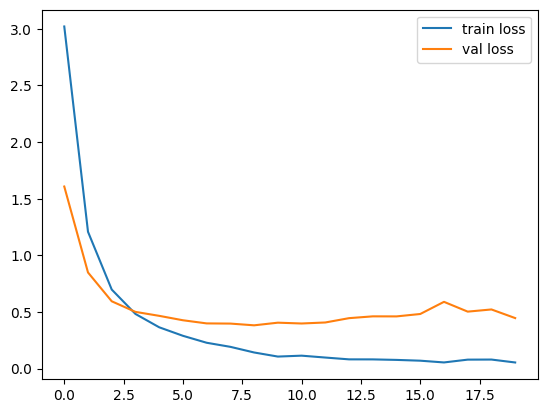

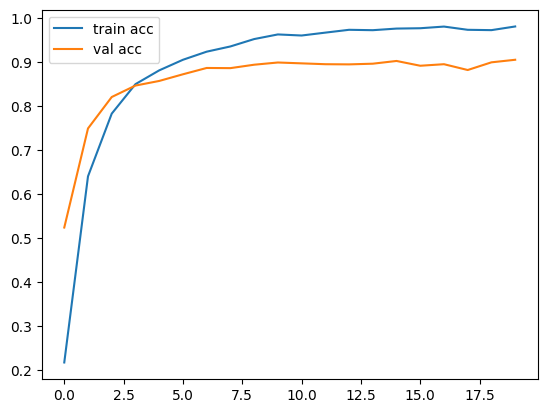

In [20]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [21]:
# Load the trained model
trained_model = load_model('model.keras')

# Evaluate the model on the test set to get the test accuracy
test_loss, test_accuracy = trained_model.evaluate(test_set)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test data
predictions = trained_model.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_set.classes

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9548 - loss: 0.1911
Test Accuracy: 0.9331831932067871
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.91      1.00      0.95        30
           3       0.97      0.93      0.95        30
           4       0.97      1.00      0.98        30
           5       1.00      0.90      0.95        30
           6       0.97      0.97      0.97        30
           7       0.94      0.97      0.95        30
           8       0.97      0.97      0.97        30
           9       1.00      0.97      0.98        30
          10       1.00      0.96      0.98        23
          11       1.00      0.91      0.95        23
          12       1.00      0.91      0.95        23
          13       0.96      1.00      0.98        23
          14      

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


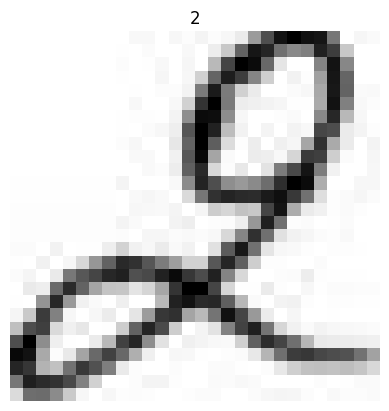

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


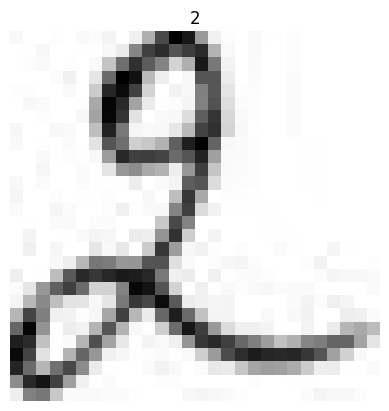

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


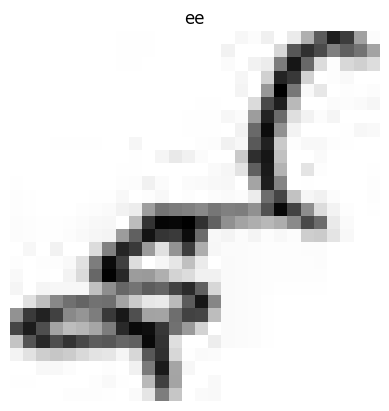

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


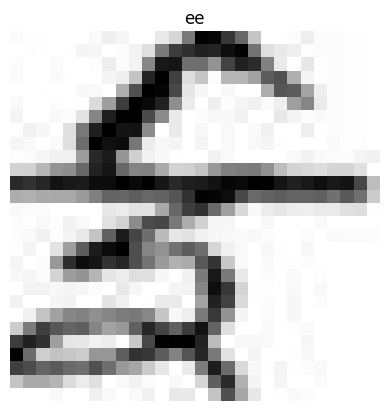

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


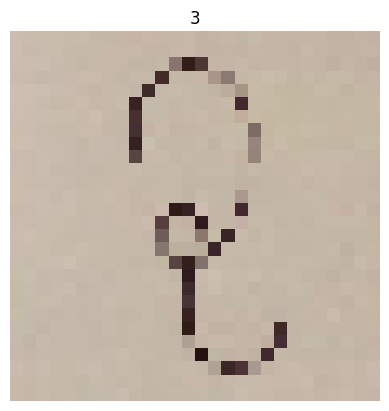

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


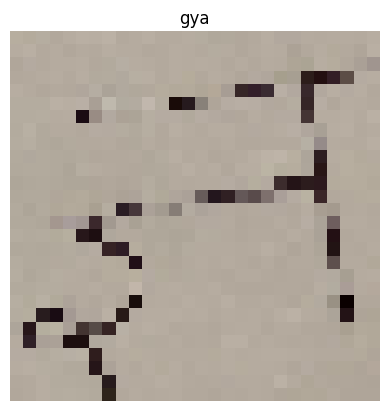

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


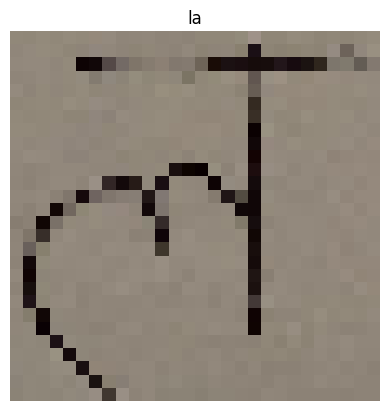

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


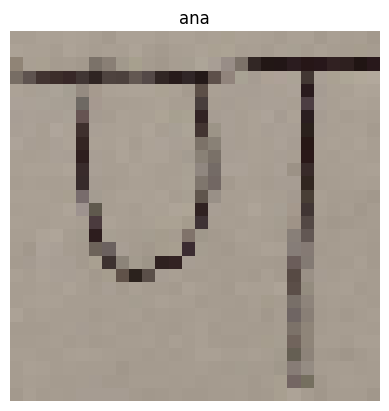

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


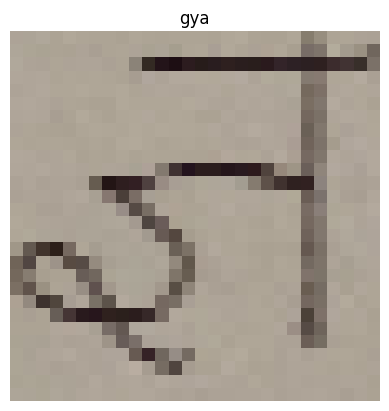

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


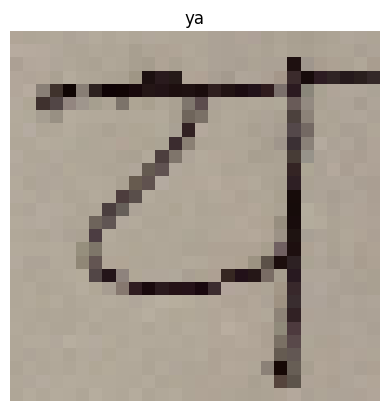

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


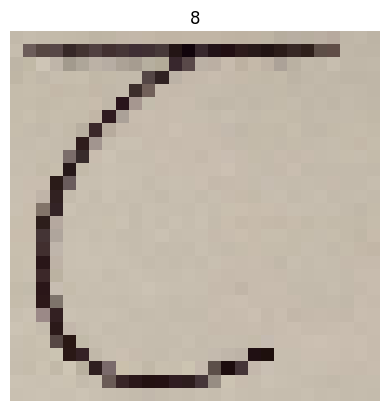

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


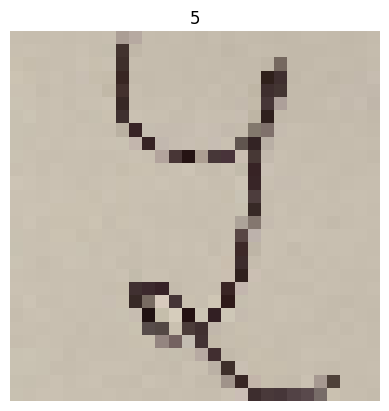

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


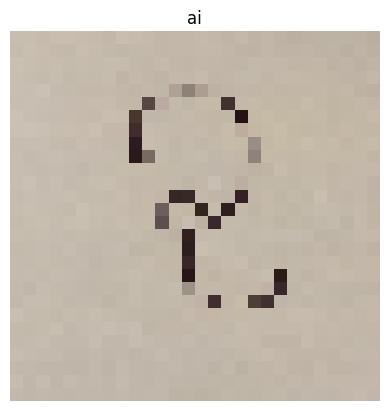

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


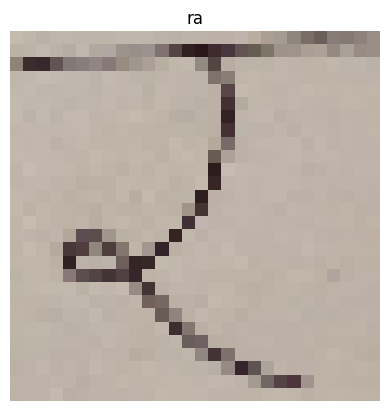

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


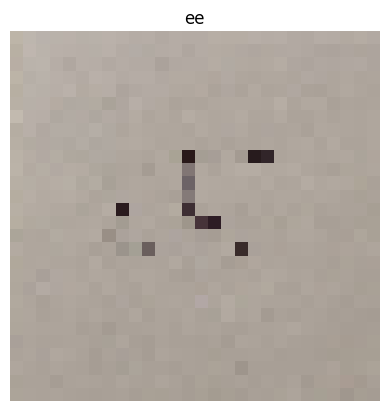

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


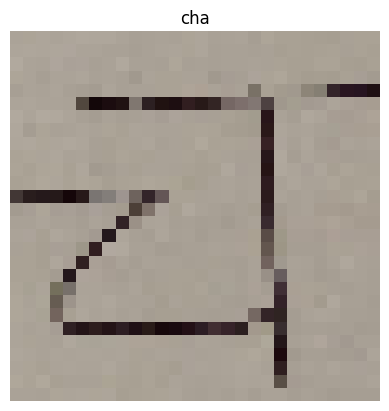

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


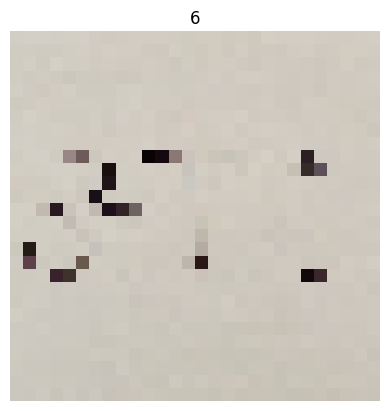

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


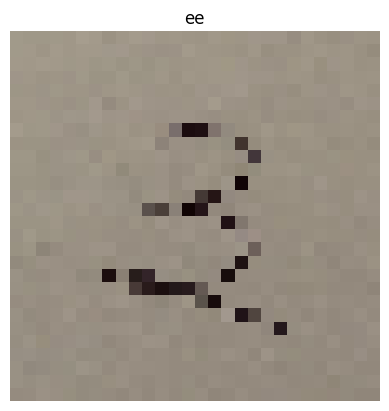

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


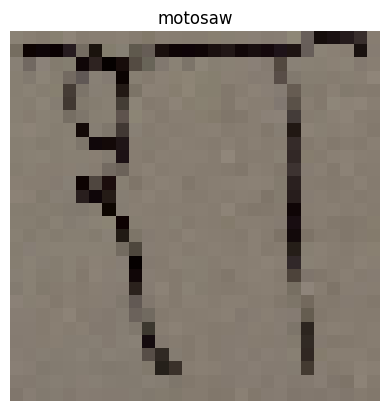

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


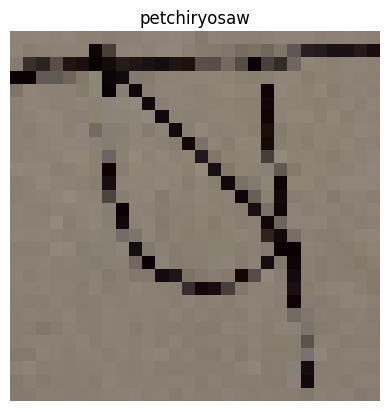

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


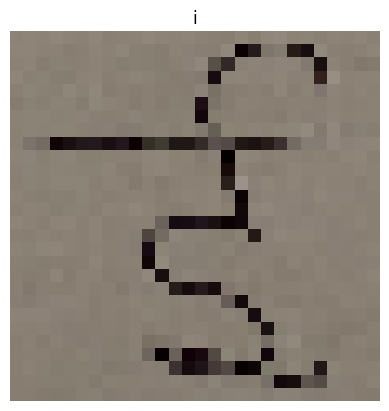

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


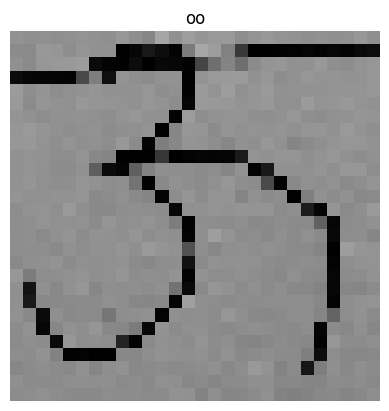

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


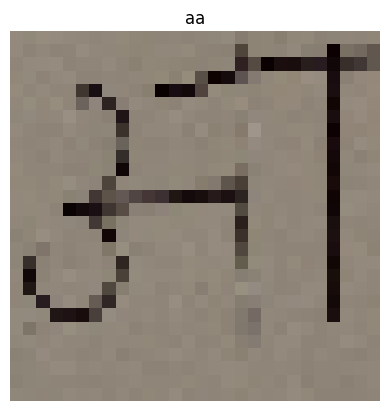

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


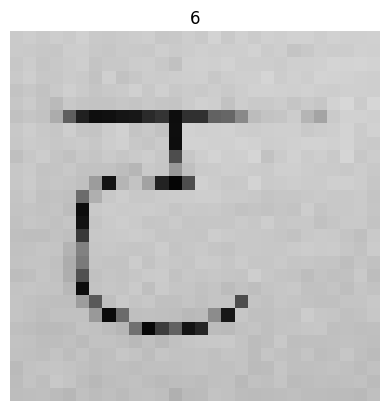

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


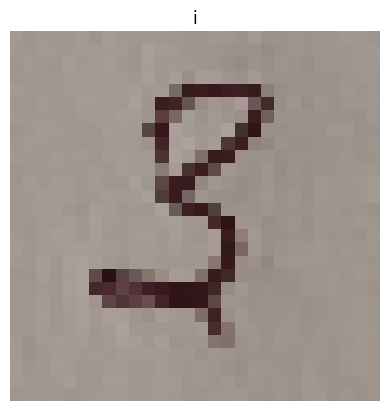

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


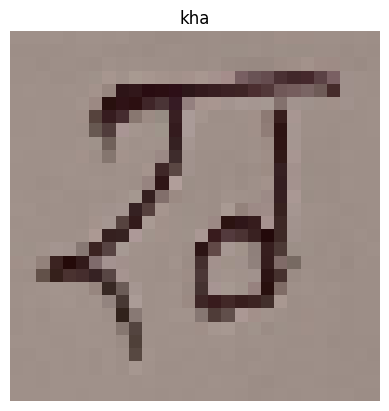

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


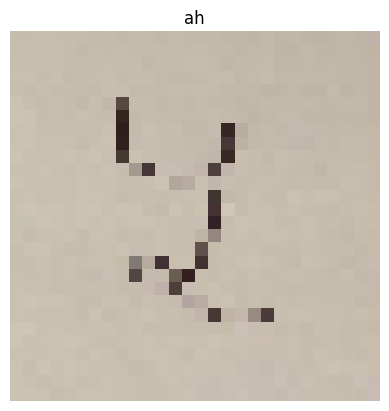

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


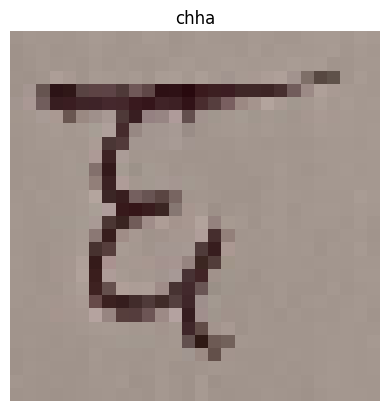

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


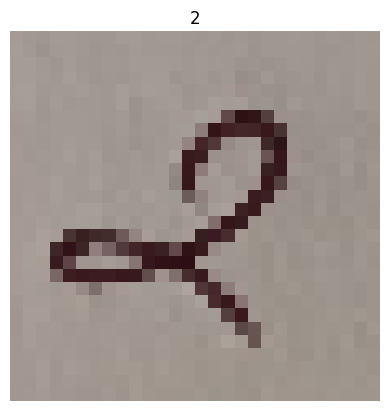

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


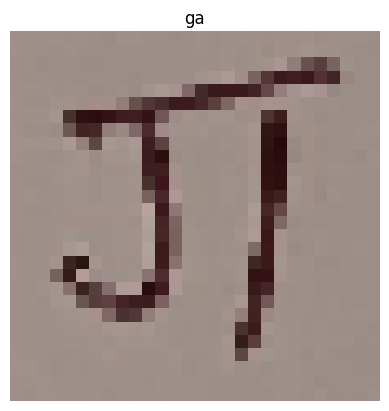

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


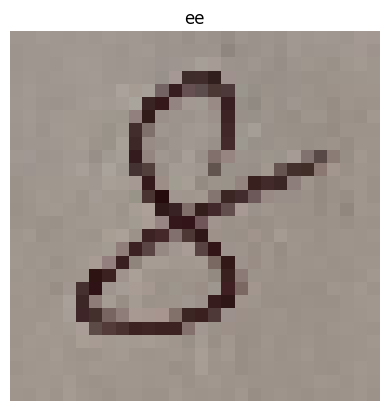

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


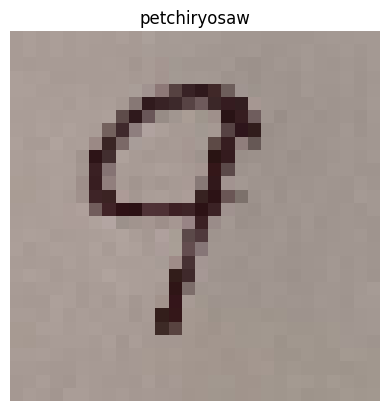

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


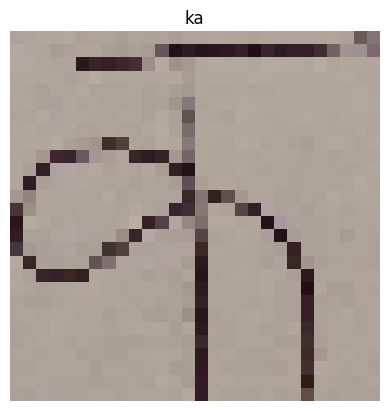

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


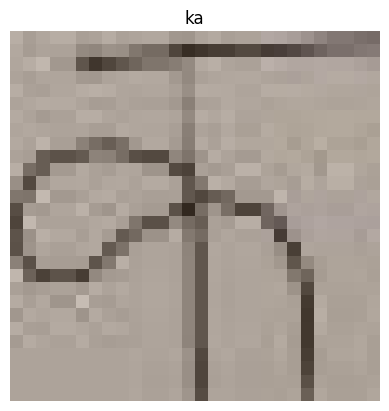

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


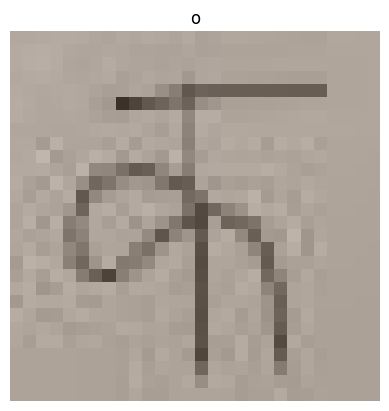

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


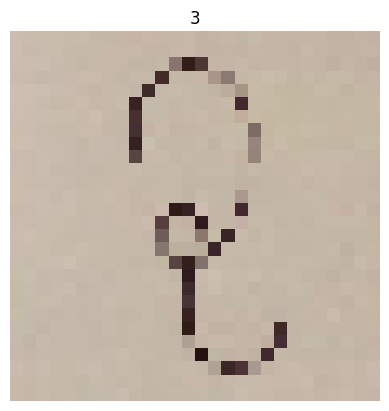

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


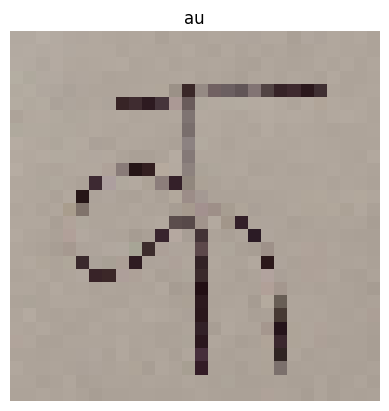

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


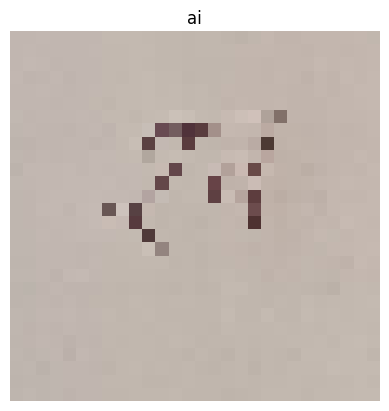

In [22]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'aa', 'ae', 'ah', 'ai', 'an', 'ana', 'au', 'ba', 'bha',
        'cha', 'chha', 'da', 'daa', 'dha', 'dhaa', 'ee', 'ga', 'gha', 'gya', 'ha', 'i', 'ja', 'jha', 'ka', 'kha', 'kna',
        'ksha', 'la', 'ma', 'motosaw', 'na', 'o', 'oo', 'pa', 'patalosaw', 'petchiryosaw', 'pha', 'ra', 'ta', 'taa', 'tha',
        'thaa', 'tra', 'u', 'va', 'ya', 'yna']

# Path to the folder containing images
folder_path = r'uploaded_files'

# Get list of all image files in the folder
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Load the trained model
trained_model = load_model('model_full.keras')

# Iterate over each image file
for image_path in image_files:
    # Load the image
    img = load_img(image_path, target_size=(28, 28))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Rescale pixel values to [0, 1]

    # Make predictions
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions[0])

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Display the predicted class label
    plt.title(labels[predicted_label])
    plt.show()


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(folders), activation='softmax')  # Change the output layer activation according to the number of classes
])

# Compile the model with Adam optimizer and a specific learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with data augmentation and callbacks
history = model.fit(train_set,
                    epochs=20,
                    validation_data=valid_set,
                    callbacks=[early_stopping])


C:\Users\basne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.0496 - loss: 3.8861 - val_accuracy: 0.4375 - val_loss: 1.9222
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 30s 107ms/step - accuracy: 0.4575 - loss: 1.8089 - val_accuracy: 0.7541 - val_loss: 0.8023
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 32s 112ms/step - accuracy: 0.7230 - loss: 0.9204 - val_accuracy: 0.8473 - val_loss: 0.5074
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 44s 154ms/step - accuracy: 0.8211 - loss: 0.5728 - val_accuracy: 0.8974 - val_loss: 0.3642
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 47s 165ms/step - accuracy: 0.8705 - loss: 0.4041 - val_accuracy: 0.9056 - val_loss: 0.3406
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 45s 158ms/step - accuracy: 0.9013 - loss: 0.3098 - val_accuracy: 0.9083 - val_loss: 0.3094
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 44s 156ms/step - accuracy: 0.9287 - loss: 0.2254 - val_accuracy: 0.9138 - val_loss: 0.2964
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 42s 150ms/step - accuracy: 0.9352 - loss: 0